### Objective and Context for Essay Scoring Model Development

Essay writing is a critical tool for evaluating student learning, analytical thinking, and written communication skills. However, manual grading of essays can be time-consuming and subject to inconsistencies due to factors like grader fatigue and subjective bias. To address these challenges, we aim to develop an **Automated Essay Scoring (AES) model** using advanced Machine Learning (ML) and Artificial Intelligence (AI) techniques.

#### Goals of the Project:

1.  **Build an Accurate Scoring System**  
    Develop a model capable of accurately predicting essay scores based on predefined evaluation criteria, ensuring it aligns closely with human grader judgments.
    
2.  **Enhance the Educational Feedback Loop**  
    Provide timely and consistent feedback to students, supporting their learning process by helping them identify strengths and areas for improvement in their writing.
    
3.  **Assist Educators**  
    Supplement educators' efforts by reducing the manual workload associated with essay grading, allowing them to focus on higher-value teaching activities.
    
4.  **Ensure Efficiency and Accessibility**  
    Design a model that is computationally efficient and not resource-intensive, enabling deployment in educational settings with varying levels of technological resources.
    
5.  **Maintain Fairness and Bias Mitigation**  
    Implement techniques to ensure that the scoring model is fair, unbiased, and robust across different demographics and writing styles.
    

By achieving these goals, the Automated Writing Evaluation (AWE) system will contribute to a more equitable, scalable, and efficient assessment process in education.

### **Project Roadmap: Automated Essay Scoring Model**

#### **1. Data Collection and Preparation**

-   **Data Acquisition**:  
    Gather a well-labeled dataset of essays with corresponding scores. Ensure diversity in writing styles, topics, and demographics for generalizability.
-   **Data Cleaning**:  
    Remove any duplicates, irrelevant data, and resolve missing values. Standardize essay text (e.g., remove extra whitespace, handle encoding issues).
-   **Annotation Review**:  
    Validate the quality of existing score annotations. Ensure consistency and alignment with scoring rubrics.

----------

#### **2. Exploratory Data Analysis (EDA)**

-   **Text Characteristics**:
    -   Analyze essay length (word and sentence counts) and vocabulary richness.
    -   Examine punctuation, grammatical errors, and structural patterns.
-   **Score Distribution**:  
    Visualize the distribution of essay scores. Identify potential biases, score imbalance, or gaps in the dataset.
-   **Feature Correlation**:  
    Check relationships between essay features (e.g., length, lexical diversity) and scores.
-   **Rubric Analysis**:  
    If applicable, explore correlations between specific rubric criteria (e.g., coherence, grammar, relevance) and scores.

----------

#### **3. Feature Engineering**

-   **Textual Features**:
    -   Extract features like word count, sentence count, average sentence length, and use of advanced vocabulary.
    -   Calculate readability metrics (e.g., Flesch-Kincaid score).
-   **NLP-Based Features**:
    -   Apply NLP techniques like TF-IDF, word embeddings (e.g., Word2Vec, GloVe), or contextual embeddings (e.g., BERT, RoBERTa).
    -   Extract grammatical, syntactic, and semantic features using NLP libraries.
-   **Domain-Specific Features**:
    -   Include task-specific metrics such as adherence to essay prompts or logical flow.
-   **Augmentation**:
    -   Create additional data or augment existing samples using paraphrasing techniques.

----------

#### **4. Model Selection and Training**

-   **Baseline Models**:  
    Start with simple models (e.g., linear regression, decision trees) for benchmarking.
-   **Advanced Models**:
    -   Use more complex ML models (e.g., Random Forest, Gradient Boosting) and DL models (e.g., LSTMs, Transformers).
    -   Fine-tune pre-trained transformer models like BERT, RoBERTa, or T5 for essay scoring.
-   **Hyperparameter Tuning**:  
    Optimize model performance through grid search, random search, or Bayesian optimization.

----------

#### **5. Evaluation**

-   **Primary Metric**:  
    Use **Quadratic Weighted Kappa (QWK)** to evaluate model agreement with human graders.
    -   QWK ranges from -1 (less agreement than random) to 1 (perfect agreement).
-   **Supplementary Metrics**:  
    Use RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error) to measure score prediction accuracy.
-   **Cross-Validation**:  
    Implement k-fold cross-validation to ensure model robustness and generalizability.
-   **Human-in-the-Loop Evaluation**:  
    Compare model scores with human evaluations for edge cases and identify inconsistencies.

----------

#### **6. Model Testing and Validation**

-   **Stress Testing**:  
    Test the model on adversarial cases (e.g., essays with off-topic writing or repetitive phrases).
-   **Bias Analysis**:  
    Ensure fairness by analyzing performance across demographics, essay lengths, and writing styles.

----------

#### **7. Deployment and Usage**

-   **Model Packaging**:  
    Deploy the model as a REST API or integrate it into an educational software platform.
-   **User Interface**:  
    Develop a simple interface for educators and students to upload essays and view scores with feedback.
-   **Feedback Mechanism**:  
    Allow educators to provide corrections or suggestions, creating a feedback loop to improve the model over time.
-   **Resource Efficiency**:  
    Optimize the model for low-latency scoring and scalability in resource-constrained environments.

----------

#### **8. Continuous Improvement**

-   Regularly update the model with new data to improve accuracy and relevance.
-   Monitor performance metrics and address potential issues, such as drift in scoring patterns or rubric changes.

----------

### **Evaluation Metric Details**

-   **Quadratic Weighted Kappa (QWK)**:
    -   QWK evaluates how well the predicted scores agree with the actual scores.
    -   The formula adjusts for random agreement and penalizes large deviations more heavily.
    -   Ideal QWK values are close to 1, indicating high agreement between model predictions and true scores.
    -   Negative QWK values signal less agreement than expected by random chance, necessitating model refinement.

# Load the data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/train.csv")
test = pd.read_csv("/kaggle/input/learning-agency-lab-automated-essay-scoring-2/test.csv")

In [2]:
data.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [3]:
data.isna().sum()

essay_id     0
full_text    0
score        0
dtype: int64

In [4]:
test.isna().sum()

essay_id     0
full_text    0
dtype: int64

In [5]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.6 MB/s eta 0:00:00


In [6]:
import re
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Ensure NLTK stopwords are downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def prepare_data(df):
    # Feature 1: Sentence length (word count)
    df['Length'] = df['full_text'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

    # Initialize the spell checker
    spell = SpellChecker()

    # Feature 2: Count spelling mistakes
    def count_spelling_mistakes(text):
        if not isinstance(text, str) or not text.strip():
            return 0
        words = text.split()
        misspelled = spell.unknown(words)
        return len(misspelled)
    
    df['Num_Spelling_Mistakes'] = df['full_text'].apply(count_spelling_mistakes)

    # Feature 3: Average word length
    def average_word_length(text):
        if not isinstance(text, str) or not text.strip():
            return 0
        words = text.split()
        return sum(len(word) for word in words) / len(words) if words else 0
    
    df['Avg_Word_Length'] = df['full_text'].apply(average_word_length)

    # Feature 4: Punctuation count
    def count_punctuation(text):
        if not isinstance(text, str) or not text.strip():
            return 0
        return len(re.findall(r'[^\w\s]', text))
    
    df['Punctuation_Count'] = df['full_text'].apply(count_punctuation)

    # Feature 5: Stopword ratio
    stop_words = set(stopwords.words('english'))
    def stopword_ratio(text):
        if not isinstance(text, str) or not text.strip():
            return 0
        words = text.split()
        stopword_count = sum(1 for word in words if word in stop_words)
        return stopword_count / len(words) if words else 0
    
    df['Stopword_Ratio'] = df['full_text'].apply(stopword_ratio)
    return df
    

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
updated_df_train = prepare_data(data)
updated_df_test = prepare_data(test)

In [8]:
updated_df_train.head()

,essay_id,full_text,score,Length,Num_Spelling_Mistakes,Avg_Word_Length,Punctuation_Count,Stopword_Ratio
0,000d118,Many people have car where they live. The thin...,3,498,54,4.369478,41,0.473896
1,000fe60,I am a scientist at NASA that is discussing th...,3,332,34,4.018072,41,0.527108
2,001ab80,People always wish they had the same technolog...,4,550,43,4.574545,56,0.474545
3,001bdc0,"We all heard about Venus, the planet without a...",4,451,48,4.982262,64,0.392461
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,373,41,4.873995,46,0.447721


In [9]:
updated_df_test.head()

,essay_id,full_text,Length,Num_Spelling_Mistakes,Avg_Word_Length,Punctuation_Count,Stopword_Ratio
0,000d118,Many people have car where they live. The thin...,498,54,4.369478,41,0.473896
1,000fe60,I am a scientist at NASA that is discussing th...,332,34,4.018072,41,0.527108
2,001ab80,People always wish they had the same technolog...,550,43,4.574545,56,0.474545


In [10]:
df = updated_df_train.copy()

In [11]:
df.describe()

,score,Length,Num_Spelling_Mistakes,Avg_Word_Length,Punctuation_Count,Stopword_Ratio
count,17307.000000,17307.000000,17307.000000,17307.000000,17307.000000,17307.000000
mean,2.948402,368.348241,40.677934,4.536643,43.188305,0.441744
std,1.044899,150.394776,19.233619,0.310465,24.834503,0.043567
min,1.000000,150.000000,2.000000,3.441948,0.000000,0.000000
25%,2.000000,253.000000,27.000000,4.320967,26.000000,0.414141
50%,3.000000,345.000000,37.000000,4.534527,38.000000,0.441624
75%,4.000000,452.000000,50.000000,4.750988,55.000000,0.469444
max,6.000000,1656.000000,192.000000,5.877500,289.000000,0.609524


In [12]:
print(f"""
Average Words Length: {df['Length'].mean()}
Maximum Words Length: {df['Length'].max()}
Median words Length: {df['Length'].median()}
""")


Average Words Length: 368.3482405962905
Maximum Words Length: 1656
Median words Length: 345.0



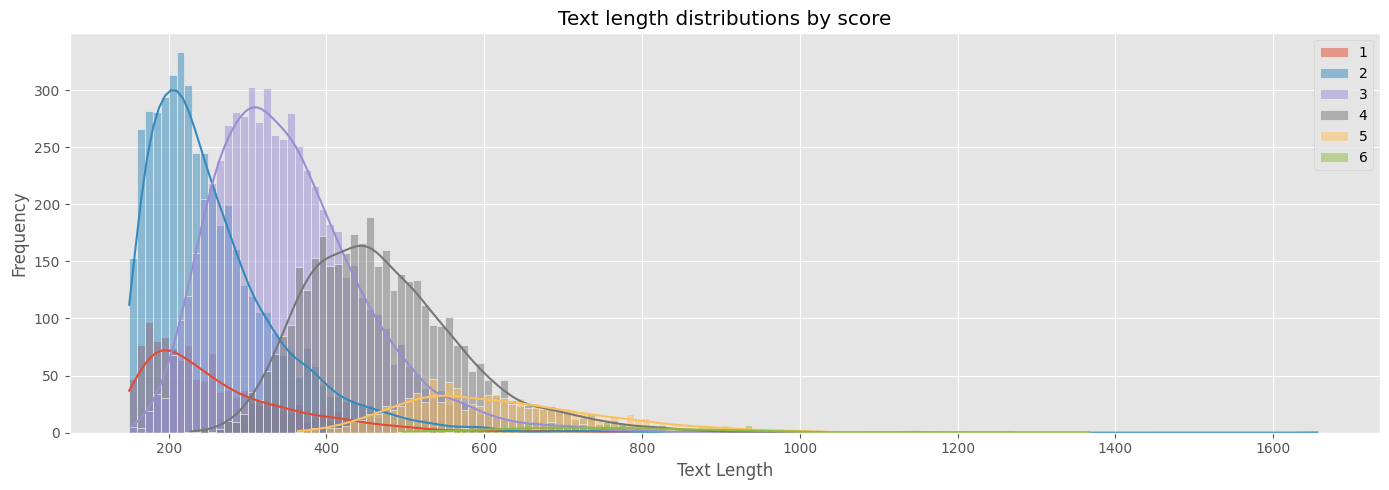

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


bin_width = 10

bins = range(df.Length.min(), df.Length.max() + bin_width, bin_width)

plt.figure(figsize=(14, 5))
for label, group_df in df.groupby('score'):
    sns.histplot(group_df.Length.values, kde=True, bins=bins, label=label, alpha=0.5)
plt.title('Text length distributions by score')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

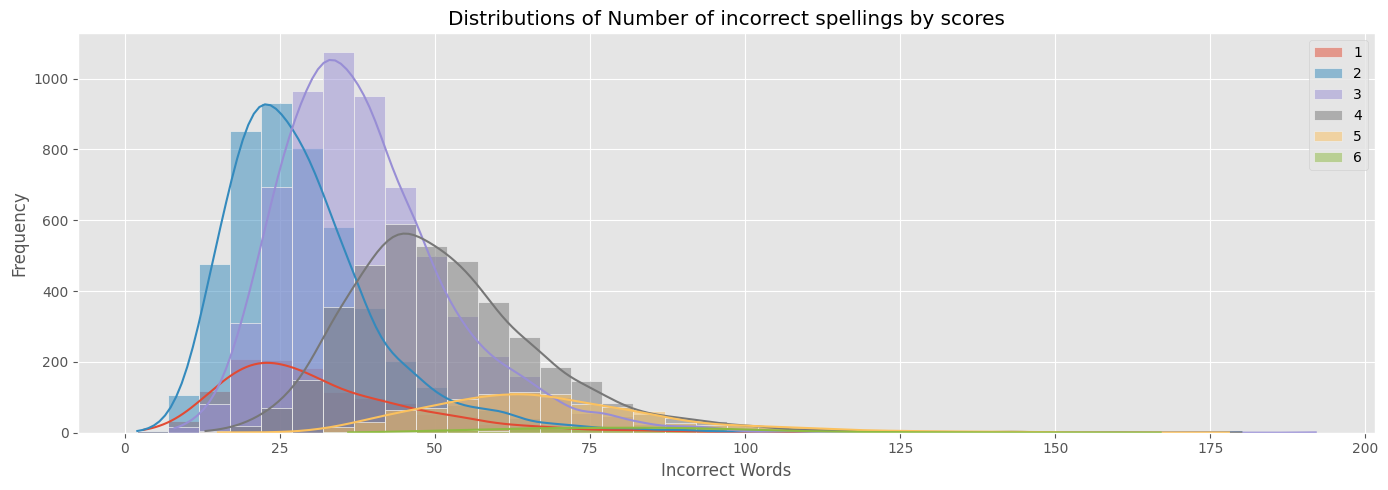

In [14]:
bin_width = 5

bins = range(df.Num_Spelling_Mistakes.min(), df.Num_Spelling_Mistakes.max() + bin_width, bin_width)

plt.figure(figsize=(14, 5))
for label, group_df in df.groupby('score'):
    sns.histplot(group_df.Num_Spelling_Mistakes.values, kde=True, bins=bins, label=label, alpha=0.5)
plt.title('Distributions of Number of incorrect spellings by scores')
plt.xlabel('Incorrect Words')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

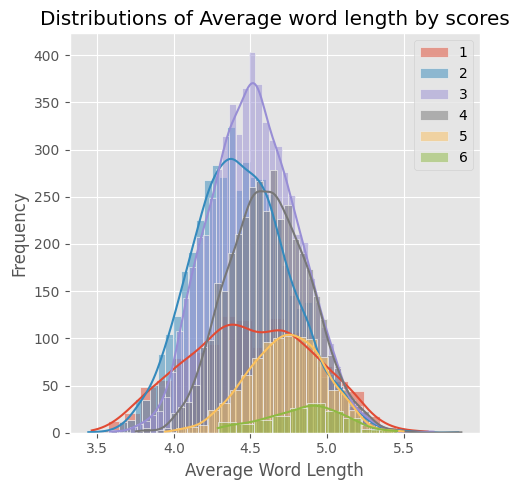

In [15]:
plt.figure(figsize=(5, 5))
for label, group_df in df.groupby('score'):
    sns.histplot(group_df.Avg_Word_Length.values, kde=True, label=label, alpha=0.5)
plt.title('Distributions of Average word length by scores')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
df.head(2)

,essay_id,full_text,score,Length,Num_Spelling_Mistakes,Avg_Word_Length,Punctuation_Count,Stopword_Ratio
0,000d118,Many people have car where they live. The thin...,3,498,54,4.369478,41,0.473896
1,000fe60,I am a scientist at NASA that is discussing th...,3,332,34,4.018072,41,0.527108


In [17]:
from wordcloud import WordCloud

def plot_wordcloud(score, width=720, height=520):
    if score not in df.score.unique():
        print(f"Score '{score}' does not exist in the Score column.")
        return
    
    text = ' '.join(df[df['score'] == score]['full_text'])
    wordcloud_ = WordCloud(width=width, height=height, background_color='black').generate(text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Score:{score}')
    plt.show()

    word_frequencies = wordcloud_.words_

    # Top 20 Words used in essay
    words = pd.DataFrame(word_frequencies, index=[0]).T[:20]
    words.reset_index(inplace=True)
    words.rename(columns={0:'Normalized Frequencies', 'index':'Word'}, inplace=True)
    words['Normalized Frequencies'] = words['Normalized Frequencies'] * 100
    print(f'Top 20 words used in Essay of Scores : {score} ')
    print(words.head(20))

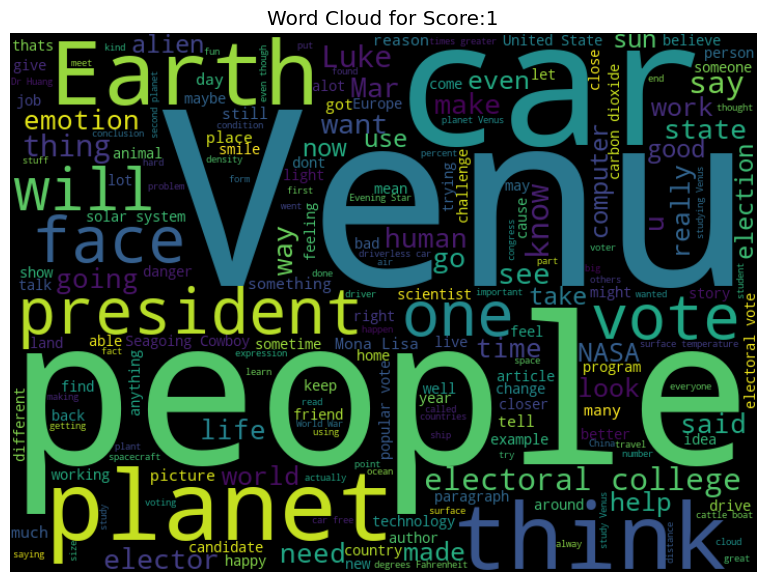

Top 20 words used in Essay of Scores : 1 
                 Word  Normalized Frequencies
0                Venu              100.000000
1              people               83.268671
2                 car               58.535403
3              planet               51.212415
4               think               44.325897
5               Earth               42.580019
6           president               41.561591
7                face               41.367604
8                 one               40.397672
9                vote               40.058196
10               will               36.178468
11  electoral college               35.451018
12               know               35.160039
13                say               34.529583
14              thing               31.959263
15               Luke               31.571290
16                see               30.164888
17                 go               29.000970
18            elector               28.516004
19              state               28

In [18]:
plot_wordcloud(1)

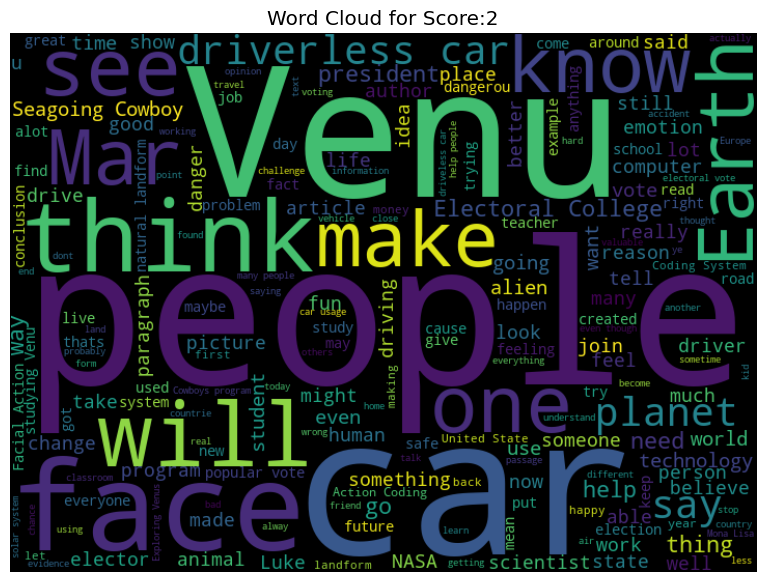

Top 20 words used in Essay of Scores : 2 
                 Word  Normalized Frequencies
0              people              100.000000
1                 car               92.188785
2                Venu               82.913994
3                face               71.452064
4               think               67.932906
5                will               55.369183
6                 see               44.318369
7                 one               43.446802
8                know               40.684098
9                 Mar               40.684098
10               make               40.486762
11              Earth               40.388094
12     driverless car               38.612070
13             planet               38.365400
14                say               38.233843
15  Electoral College               37.970728
16                 go               36.572932
17              thing               35.997369
18                way               35.948035
19               help               34

In [19]:
plot_wordcloud(2)

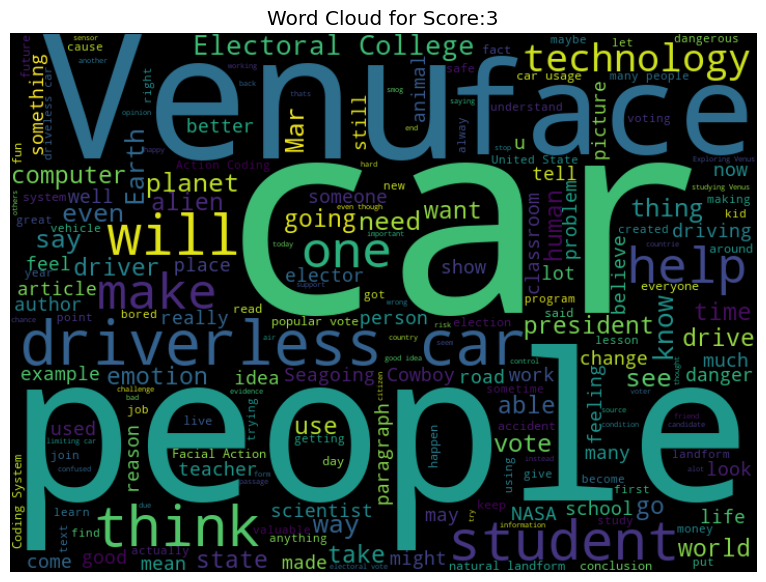

Top 20 words used in Essay of Scores : 3 
                 Word  Normalized Frequencies
0                 car              100.000000
1              people               86.794521
2                Venu               64.940639
3                face               61.899543
4      driverless car               61.689498
5               think               50.374429
6                will               49.506849
7             student               48.401826
8                 one               40.611872
9                help               39.598174
10               make               39.415525
11         technology               37.789954
12  Electoral College               37.470320
13               know               37.178082
14                see               35.570776
15                way               35.461187
16              Earth               34.885845
17               need               33.990868
18                say               33.917808
19             planet               33

In [20]:
plot_wordcloud(3)

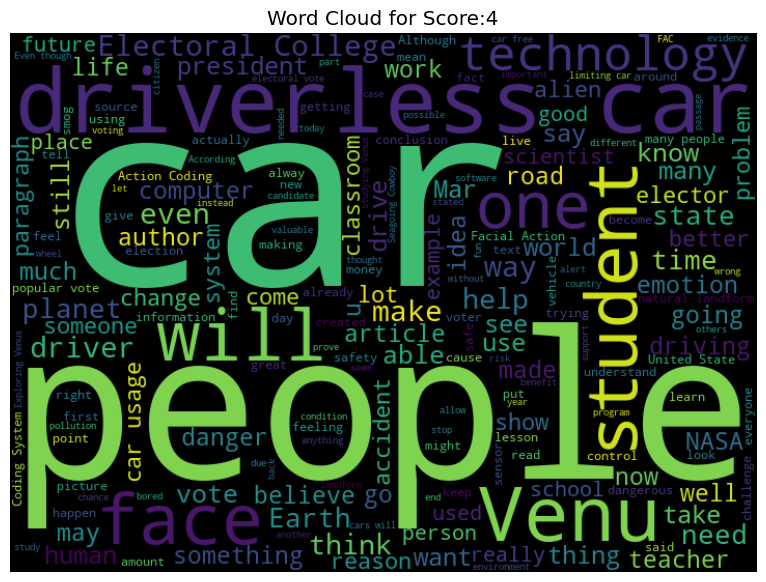

Top 20 words used in Essay of Scores : 4 
                 Word  Normalized Frequencies
0                 car              100.000000
1              people               72.282761
2      driverless car               70.857782
3                Venu               51.289932
4             student               44.165037
5                will               43.848375
6                face               42.795939
7                 one               36.322995
8          technology               35.186737
9   Electoral College               35.158797
10             driver               33.985285
11               make               32.802459
12               even               32.103940
13                way               31.852473
14               help               30.380926
15              think               29.775543
16              Earth               28.629971
17             planet               28.415759
18               time               28.238800
19              state               27

In [21]:
plot_wordcloud(4)

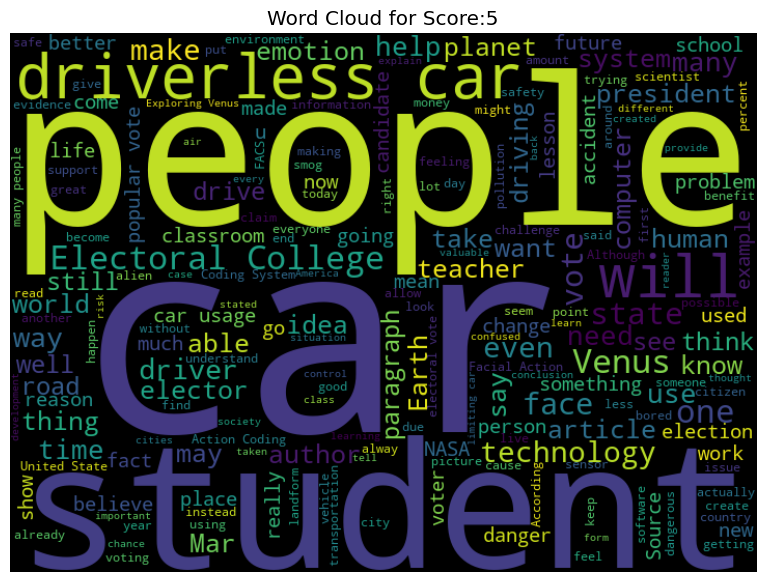

Top 20 words used in Essay of Scores : 5 
                 Word  Normalized Frequencies
0                 car              100.000000
1              people               70.542217
2             student               58.079309
3      driverless car               56.298894
4                will               53.223631
5   Electoral College               46.587537
6               Venus               45.184786
7                 one               43.512274
8                vote               39.438899
9               state               39.169139
10               face               37.820340
11         technology               35.500405
12               even               34.637173
13               make               34.205557
14             driver               31.265174
15                way               31.076342
16                use               27.731319
17               help               27.623415
18               need               27.299703
19               many               27

In [22]:
plot_wordcloud(5)

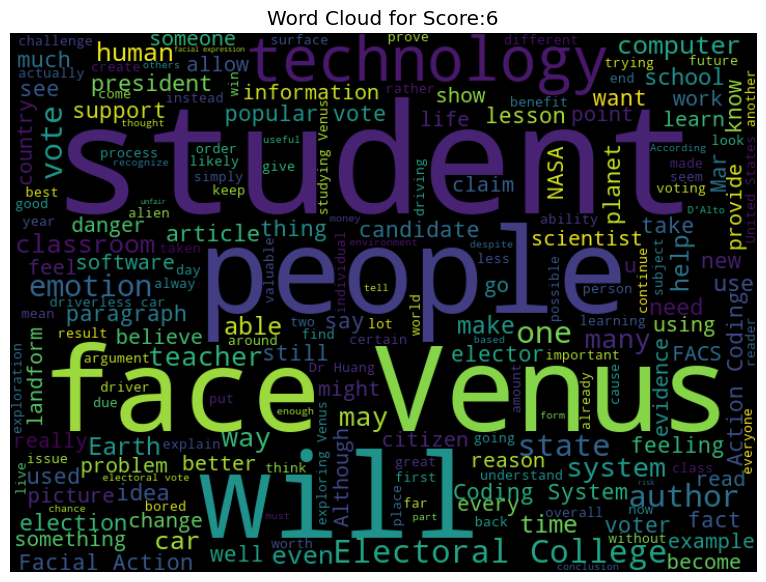

Top 20 words used in Essay of Scores : 6 
                 Word  Normalized Frequencies
0             student              100.000000
1               Venus               56.313131
2              people               55.934343
3                will               54.419192
4                face               53.787879
5          technology               48.484848
6   Electoral College               48.484848
7              author               46.590909
8                 one               46.338384
9               state               46.085859
10               vote               45.707071
11            emotion               43.560606
12             system               37.121212
13            teacher               34.848485
14                may               34.217172
15               many               33.712121
16                way               33.333333
17               even               31.565657
18          classroom               31.060606
19                car               30

In [23]:
plot_wordcloud(6)

# Baseline Model

In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vec = TfidfVectorizer(ngram_range=(1,6),
                   min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
                   analyzer='char',
                   stop_words='english',
                   smooth_idf=1, sublinear_tf=1,
                   max_features=50000)

X = vec.fit_transform(df['full_text'])

In [25]:
df['label'] = df['score'].map(lambda X : X - 1)

In [26]:
y = df.label

In [27]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [28]:
train_X.shape

(13845, 50000)

In [29]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C=1.2, solver='sag', max_iter=1500)

classifier.fit(train_X, train_y)

LogisticRegression(C=1.2, max_iter=1500, solver='sag')

In [30]:
classifier.score(train_X, train_y)

0.7729866377753701

In [31]:
from sklearn.metrics import cohen_kappa_score

pred = classifier.predict(test_X)

cohen_kappa_score(test_y, pred, weights='quadratic')

0.6859247930264316

# Ensemble Model

In [32]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Defining parameters for the LightGBM 
params = {
    'objective': 'multiclass',
    'num_class': 6,
    'metric': 'multi_logloss',
    'verbose': 0,
    'boosting_type' : 'gbdt'
}

# Create a LightGBM dataset
train_data = lgb.Dataset(train_X, label=train_y)
valid_data = lgb.Dataset(test_X, label=test_y, reference=train_data)

In [33]:
# Training the Model
num_round = 200
model = lgb.train(
    params,
    train_data,
    num_round,
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[68]	valid_0's multi_logloss: 0.978408


In [34]:
# Getting the model predictions
y_pred = model.predict(test_X,
                       num_iteration=model.best_iteration)

# Mapping probabilities to find the class
y_pred = np.argmax(y_pred, axis=1)


cohen_kappa_score(test_y, y_pred, weights='quadratic')

0.720527680987394